<a href="https://colab.research.google.com/github/Clinda02/customer_analysis/blob/main/4_regional_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4. 지역 별 총 매출과 평균 매출 비교

#### 회사에서 취할 수 있는 전략
* **시장 확장 전략**: 매출이 높은 국가에서 추가적인 마케팅 활동이나 판매 채널 확장을 통해 시장 점유율 증대. 반면, 매출이 낮은 국가에서는 시장 진입 전략을 재검토하거나, 새로운 시장 기회 모색.
* **제품 및 서비스 맞춤화**: 평균 매출이 높은 국가를 대상으로 고가의 프리미엄 제품이나 서비스를 제안하는 것이 유리. 반대로, 평균 매출이 낮은 국가에서는 가성비가 높은 제품을 제안하여 시장 접근성을 높일 수 있음.
* **위험 관리 및 다변화**: 특정 국가에 대한 매출 의존도가 높은 경우, 경제적 불안정성이나 국제 정세 변화 등의 외부 요인으로 인한 위험을 줄이기 위해 다른 시장으로의 다변화 고려.

* **맞춤형 마케팅 전략**: 지역별 매출 데이터를 기반으로 각 시장의 특성과 고객 선호도를 분석하여, 맞춤형 마케팅 캠페인을 설계 및 실행. 이를 통해 더 높은 고객 참여와 브랜드 충성도 구축 가능.



In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
  host = 'localhost',
  user = 'root',
  password = 'password',
  database = 'classicmodels'
)

# 지역별 총 매출 쿼리
sales_by_country_query ="""
SELECT c.country,
    sum(od.quantityOrdered * od.priceEach) as total_sales,
    avg(od.quantityOrdered * od.priceEach) as avg_sales
FROM customers c
JOIN orders o ON o.customerNumber = c.customerNumber
JOIN orderdetails od ON od.orderNumber = o.orderNumber
GROUP BY c.country
ORDER BY total_sales DESC;
"""

# 데이터프레임 생성
sales_by_country_df = pd.read_sql_query(sales_by_country_query, conn)
sales_by_country_df

C:\Users\user\AppData\Local\Temp\ipykernel_15872\3608591685.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_by_country_df = pd.read_sql_query(sales_by_country_query, conn)


,country,total_sales,avg_sales
0,USA,3273280.05,3260.239094
1,Spain,1099389.09,3214.587982
2,France,1007374.02,3208.197516
3,Australia,562582.59,3040.986973
4,New Zealand,476847.01,3200.315503
5,UK,436947.44,3034.357222
6,Italy,360616.81,2980.304215
7,Finland,295149.35,3208.145109
8,Singapore,263997.78,3341.744051
9,Denmark,218994.92,3476.109841


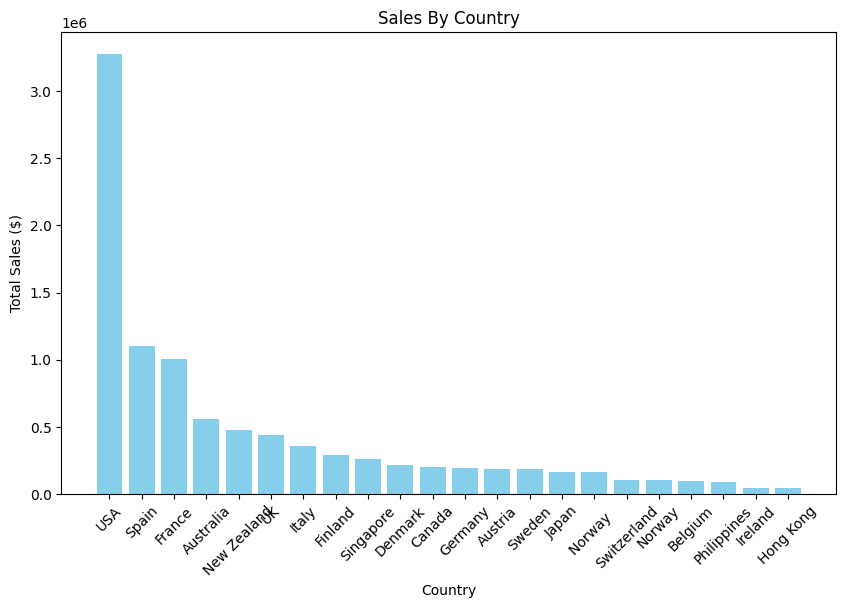

In [ ]:
# 가장 잘 팔리는 제품 시각화
plt.figure(figsize=(10,6))
plt.bar(sales_by_country_df['country'], sales_by_country_df['total_sales'], color = 'skyblue')
plt.xlabel('Country')
plt.ylabel('Total Sales ($)')
plt.title('Sales By Country')
plt.xticks(rotation=45)
plt.show()

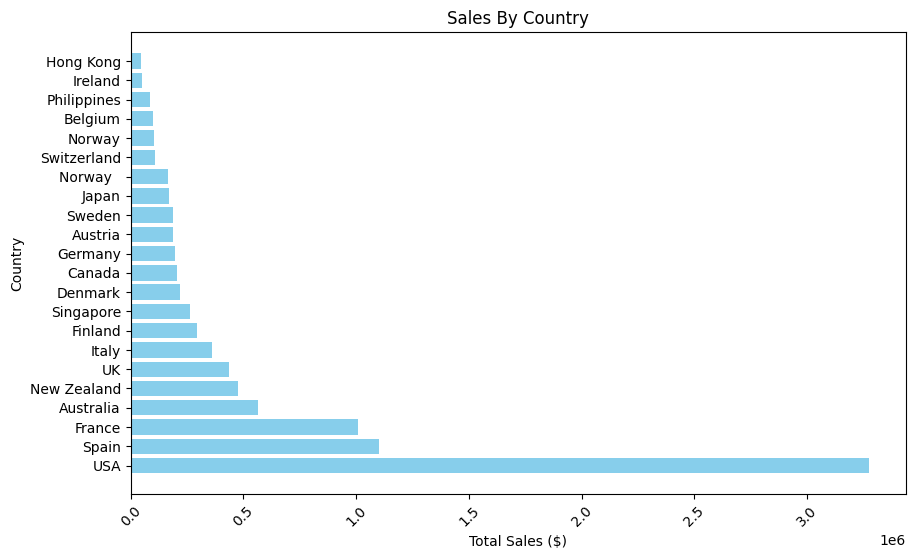

In [ ]:
# 지역별 총 매출 시각화 (barh)
plt.figure(figsize=(10,6))
plt.barh(sales_by_country_df['country'], sales_by_country_df['total_sales'], color = 'skyblue')
plt.xlabel('Total Sales ($)')
plt.ylabel('Country')
plt.title('Sales By Country')
plt.xticks(rotation=45)
plt.show()

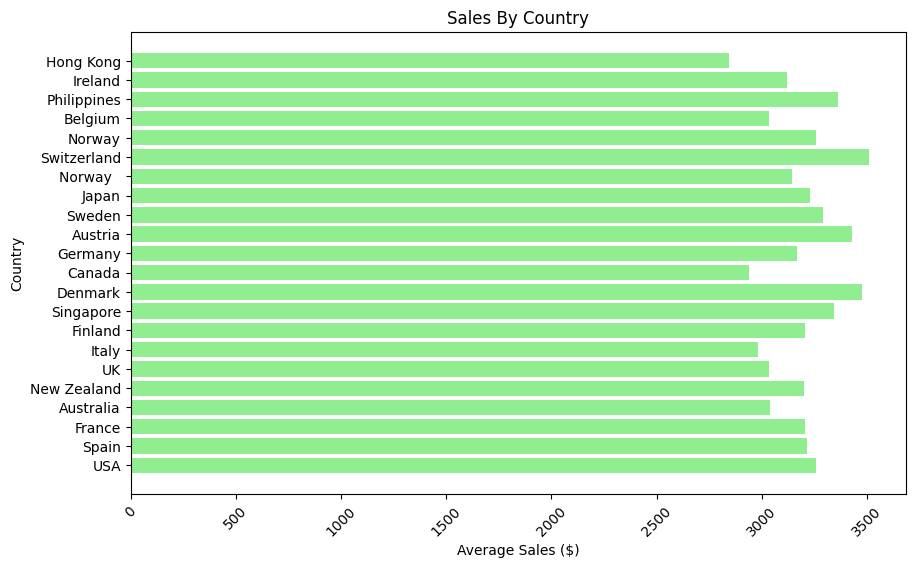

In [ ]:
# 지역별 평균 매출 시각화
plt.figure(figsize=(10,6))
plt.barh(sales_by_country_df['country'], sales_by_country_df['avg_sales'], color = 'lightgreen')
plt.xlabel('Average Sales ($)')
plt.ylabel('Country')
plt.title('Sales By Country')
plt.xticks(rotation=45)
plt.show()

### 인사이트 도출
* 지역별 총 매출 높은 국가 : **미국**
* 지역별 평균 매출은 동일